# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 2.3: Um exemplo motivacional

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math

### Figura 2.2 - Um sinal simples no domínio do tempo
Considere o sinal $x(t)=2\cos(2\pi 5t)+0.8\sin(2\pi 12 t)+0.3\cos(2\pi 47t)$
amostrado no intervalo $t\in[0,1)$ usando $N=128$ amostras $\left(t=0,\frac{1}{128},\frac{2}{128},\ldots,\frac{127}{128}\right)$.

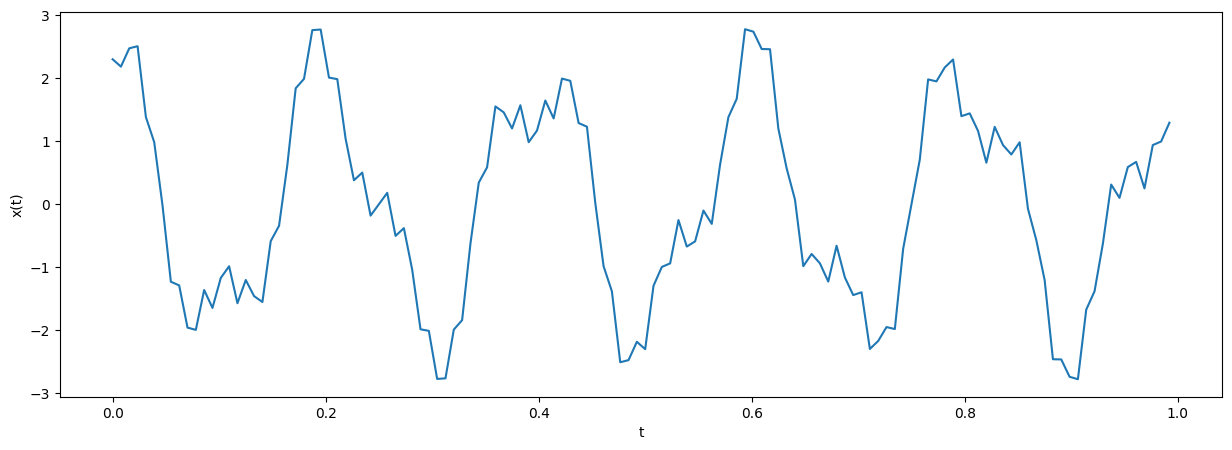

Primeiras 10 amostras do sinal: x[0:10]=[ 2.3    2.183  2.474  2.507  1.383  0.984 -0.023 -1.23  -1.288 -1.958]...


In [2]:
T = 1; 
N = 128; 
t = np.arange(0, T, 1/N); 
plt.figure(figsize=(15,5))
x = 2*np.cos(2*m.pi*5*t) + 0.8*np.sin(2*m.pi*12*t) + 0.3*np.cos(2*m.pi*47*t)
plt.plot(t,x); 
plt.xlabel("t"); 
plt.ylabel("x(t)");
plt.show()
print("Primeiras 10 amostras do sinal: x[0:10]={}...".format(np.round(x[0:10],3)))

### Decomposição do sinal em formas básicas $E_k$

$$x=\sum_{k=0}^{N-1}c_kE_k \implies c_k = \frac{(x,E_k)}{N} = \frac{1}{N}\sum_{n=0}^{N-1}x_ne^{-i2\pi k\frac{n}{N}}$$

In [3]:
X = np.fft.fft(x) # a FFT calcula X[k] = (x,E_k)
c = X / N
print(np.round(c,2))

[-0.  +0.j  -0.  -0.j  -0.  +0.j  -0.  +0.j  -0.  -0.j   1.  -0.j
  0.  +0.j   0.  +0.j  -0.  +0.j   0.  +0.j  -0.  +0.j  -0.  +0.j
 -0.  -0.4j  0.  -0.j  -0.  -0.j   0.  -0.j   0.  -0.j   0.  -0.j
  0.  -0.j   0.  +0.j   0.  +0.j  -0.  -0.j   0.  -0.j   0.  -0.j
  0.  +0.j  -0.  -0.j   0.  +0.j   0.  +0.j   0.  +0.j  -0.  -0.j
  0.  -0.j  -0.  +0.j  -0.  -0.j   0.  -0.j   0.  -0.j   0.  -0.j
  0.  -0.j  -0.  +0.j   0.  -0.j   0.  +0.j   0.  +0.j   0.  -0.j
  0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.15+0.j
 -0.  +0.j  -0.  +0.j  -0.  +0.j  -0.  +0.j  -0.  +0.j  -0.  -0.j
 -0.  +0.j  -0.  -0.j  -0.  -0.j  -0.  +0.j   0.  -0.j  -0.  -0.j
  0.  -0.j   0.  -0.j   0.  -0.j   0.  +0.j   0.  +0.j   0.  -0.j
  0.  +0.j   0.  -0.j   0.  +0.j  -0.  +0.j   0.  +0.j  -0.  -0.j
 -0.  +0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  -0.j
 -0.  -0.j  -0.  +0.j  -0.  -0.j   0.15-0.j   0.  -0.j   0.  -0.j
  0.  -0.j   0.  -0.j   0.  -0.j   0.  +0.j   0.  -0.j   0.  -0.j
  0.  +0.j

### Coeficientes não-nulos de $c$ e reconstrução de $x$

In [4]:
eps = 1e-8
form = r"x = "
for (k,), ck in np.ndenumerate(c):
    if abs(ck) > eps:
        print ("c({0}) = {1:.2f}".format(k,ck)) 
        form += r"+c_{{{0}}}E_{{{0}}}".format(k)
display(Math(form))

c(5) = 1.00-0.00j
c(12) = -0.00-0.40j
c(47) = 0.15+0.00j
c(81) = 0.15-0.00j
c(116) = -0.00+0.40j
c(123) = 1.00+0.00j


<IPython.core.display.Math object>

Observe que
$$\begin{array}{ll}
x&=E_5-0.4iE_{12}+0.15E_{47}+0.15E_{81}+0.4iE_{116}+E_{123}\\
&=E_5-0.4iE_{12}+0.15E_{47}+0.15E_{-47}+0.4iE_{-12}+E_{-5}\\
&=(E_5+E_{-5})-0.4i(E_{12}-E_{-12})+0.15(E_{47}+E_{-47})\end{array}$$
ou equivalentemente

$$\begin{array}{lll}
x_n &= &(e^{i2\pi 5\frac{n}{N}}+e^{-i2\pi 5\frac{n}{N}})\\
&&-0.4i(e^{i2\pi 12\frac{n}{N}}-e^{-i2\pi 12\frac{n}{N}})\\
&&+0.15(e^{i2\pi 47\frac{n}{N}}+e^{-i2\pi 47\frac{n}{N}})\\
&=&2\cos(2\pi 5\frac{n}{N})-0.4i(2i\sin(2\pi 12\frac{n}{N}))+0.15(2\cos(2\pi 47\frac{n}{N}))\\
&=&2\cos(2\pi 5\frac{n}{N})+0.8\sin(2\pi 12\frac{n}{N})+0.3\cos(2\pi 47\frac{n}{N})
\end{array}$$

### Energia em cada componente
$$\begin{array}{ll}
\|x\|^2&=(x,x)\\&=\displaystyle\left(\sum_{k=0}^{N-1}c_kE_k,\sum_{l=0}^{N-1}c_lE_l\right)\\
&=\displaystyle\sum_{k,l}c_k\overline{c_l}(E_k,E_l)\\
&=\displaystyle\sum_{k=0}^{N-1}|c_k|^2(E_k,E_k)=\sum_{k=0}^{N-1}N|c_k|^2\end{array}$$

In [5]:
print("E(x)\t=\t{0:.2f}".format(np.linalg.norm(x)**2))
print("--------------------------")
E = N * abs(c)**2
for (k,), Ek in np.ndenumerate(E):
    if abs(Ek) > eps: print("E({0})\t=\t{1:.2f}".format(k,Ek))
print("--------------------------")
print("E(c)\t=\t{0:.2f}".format(sum(E)))

E(x)	=	302.72
--------------------------
E(5)	=	128.00
E(12)	=	20.48
E(47)	=	2.88
E(81)	=	2.88
E(116)	=	20.48
E(123)	=	128.00
--------------------------
E(c)	=	302.72


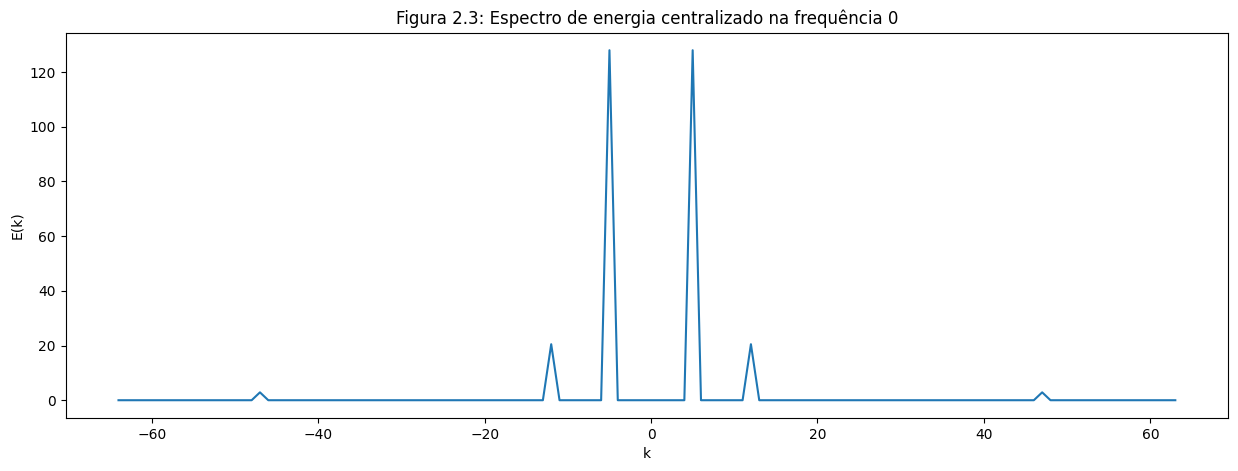

In [6]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(N) - N/2, np.roll(E, int(N/2)))
plt.xlabel("k"); plt.ylabel("E(k)")
plt.title("Figura 2.3: Espectro de energia centralizado na frequência 0")
plt.show()

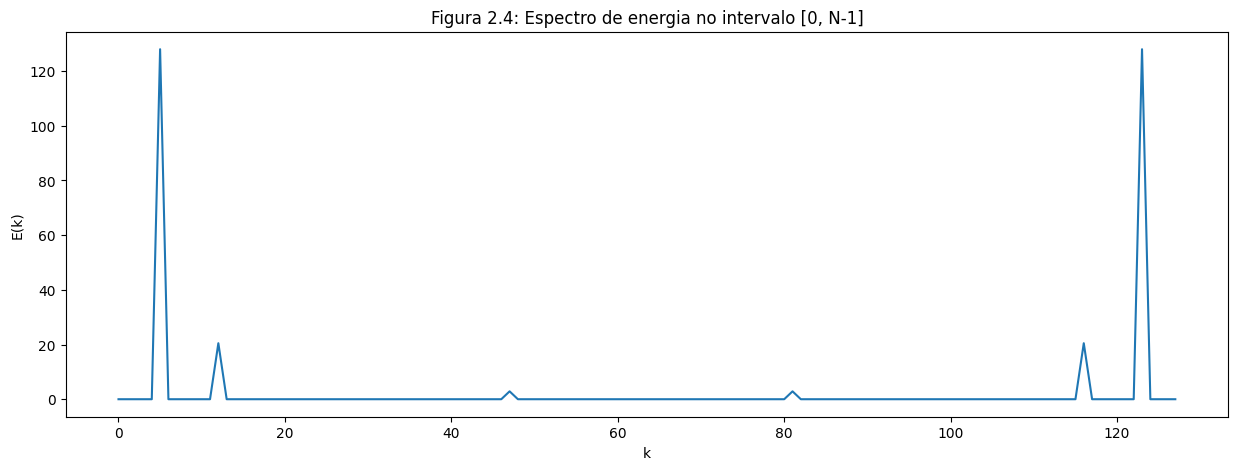

In [7]:
plt.figure(figsize=(15,5))
plt.plot(E); plt.xlabel("k"); plt.ylabel("E(k)")
plt.title("Figura 2.4: Espectro de energia no intervalo [0, N-1]")
plt.show()

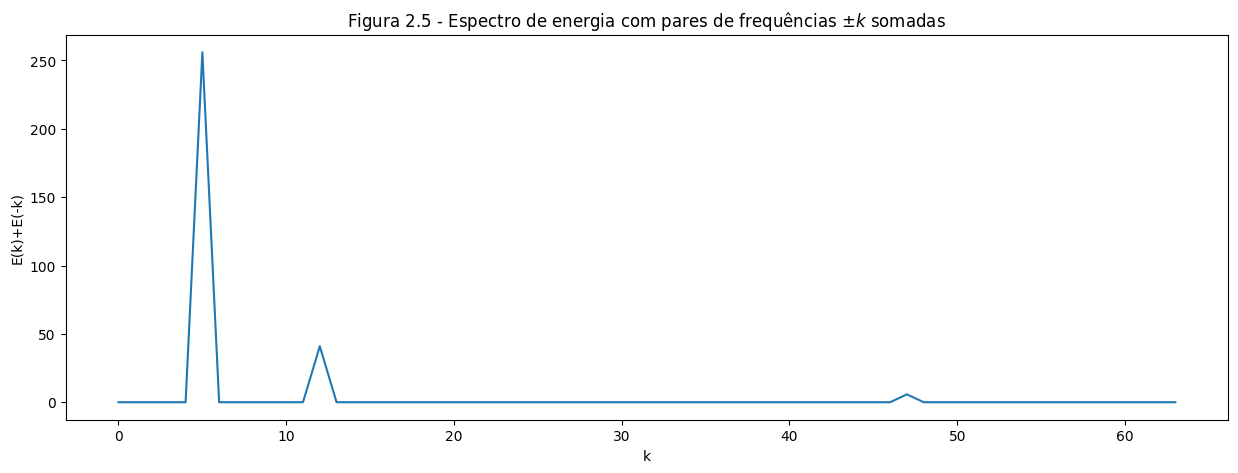

In [8]:
plt.figure(figsize=(15,5))
E[1:int(N/2)-1:1] *= 2
plt.plot(E[0:int(N/2)]); plt.xlabel("k"); plt.ylabel("E(k)+E(-k)")
plt.title(r"Figura 2.5 - Espectro de energia com pares de frequências $\pm k$ somadas")
plt.show()

### Removendo ruído associado a altas frequências

Uma técnica simples de *suavização* ou *remoção de ruído* de sinais consiste em manipular o espectro do sinal, removendo componentes senoidais/exponenciais de alta frequência (índices acima de um certo $k_0$):

$$\begin{array}{l}
x\longrightarrow X=DFT(x)\\
X\longrightarrow\quad \tilde{X}_k = \left\{\begin{array}{ll}X_k&|k|<k_0\\0&|k|\ge k_0\end{array}\right.\\ \tilde{X}\longrightarrow\quad\tilde{x}=IDFT(\tilde{X})
\end{array}$$

Observe que usamos $|k|$ para separar as altas das baixas frequências. Isso pressupõe que consideraremos o intervalo de frequências $\left(-\frac{N}{2},+\frac{N}{2}\right]$ (ou $k=-63,\ldots,64$ no exemplo anterior). Se o intervalo de representação de frequências adotado fosse $[0,N)$ ($k=0,\ldots,127$ no exemplo anterior), então as "altas frequências" estariam na porção central do vetor, ou seja, no intervalo $k_0,\ldots,N-k_0$

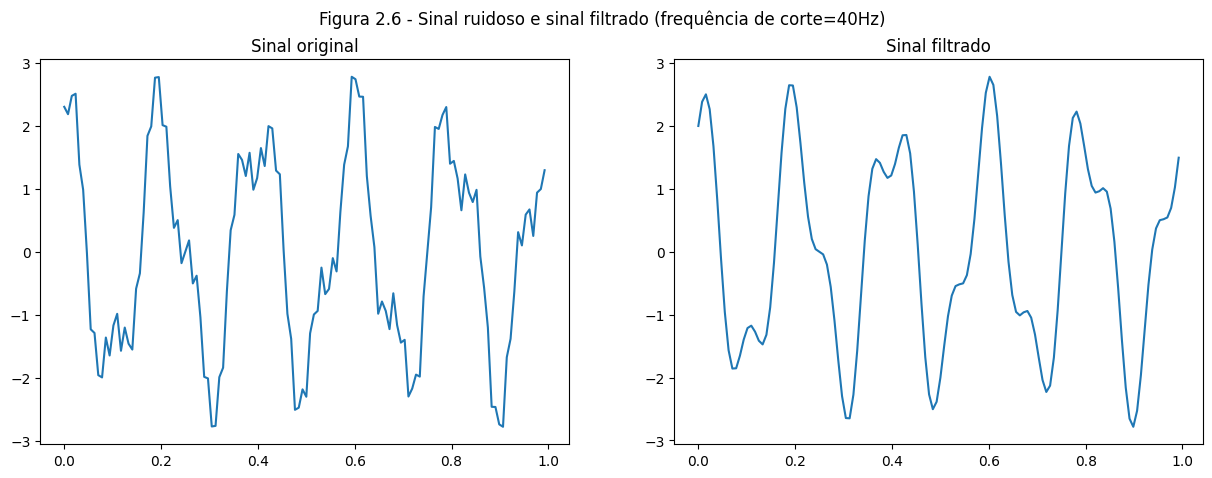

In [9]:
# Elimina "altas frequências", acima de k0=40 nesse exemplo
# (observe que k=40 ciclos por N amostras equivale a 40 Hz nesse exemplo,
# porque N amostras aqui corresponde a 1 segundo do sinal original)
Y = X; 
k0 = 40
Y[k0:N-k0:1] *= 0
y = np.real(np.fft.ifft(Y))
f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sinal original");ax[0].plot(t,x)
ax[1].set_title("Sinal filtrado");ax[1].plot(t,y)
f.suptitle("Figura 2.6 - Sinal ruidoso e sinal filtrado (frequência de corte=40Hz)")
plt.show()

----
## Refazendo o notebook com uma implementação própria da FFT



len(x)=128


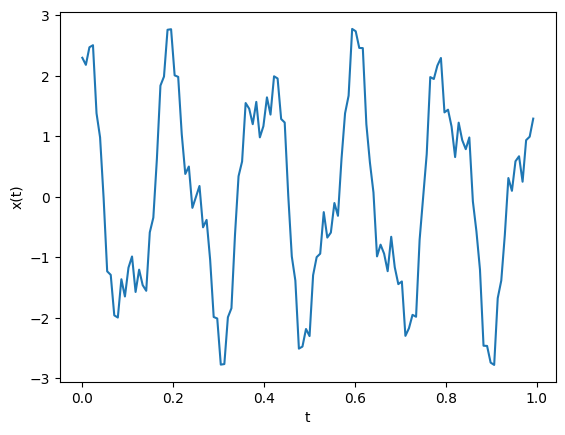

In [10]:
# 1. Utilizando o mesmo sinal com N=128 amostras
print(f'len(x)={len(x)}')

plt.plot(t,x); 
plt.xlabel("t"); 
plt.ylabel("x(t)");
plt.show()

Implementa a DFT utilizando $ X_k = (x, E_{n,k}) $ (página 79). Ou, dando um passo na implementação $ X_k = \sum_{m=0}^{(N-1)} x_m . e^{-i.2\pi . k . m/N}$


Para evitar confusão com a equação 1.34 (página 38) $x=\frac{1}{N} \sum_{k=0}^{(N-1)} \frac{(x,E_{N,k})}{(E_{N,k},E_{N,k})} E_{N,k}$ , entender que a equação 1.34 é a equação de síntese do sinal, portanto a volta do sinal decomposto. OK.


A equação 2.5 $ c_k = \frac{X_k}{N}$



In [11]:
import math

def createbasicWaveformsBase(n=4):
    t = np.arange(0, 1, 1/n)
    k = np.arange(0, n, 1).reshape((n,1))
    Enk = np.exp(1j * 2 * math.pi * t * k)
    Enk = Enk.reshape((n,n))
    return Enk


def dft1(xn):
    n = len(xn)
    Enk = createbasicWaveformsBase(n=n)
    Xk = np.inner(xn, np.conjugate(Enk)) 
    return Xk

def dft2(xn):
    n = len(xn)
    
    # Embed Enk base generation
    t = np.arange(0, 1, 1/n)
    k = np.arange(0, n, 1).reshape((n,1))
    Enk = np.exp(1j * 2 * math.pi * t * k)
    
    Xk = np.inner(xn, np.conjugate(Enk)) 
    return Xk


In [12]:
Xk = dft2(x)
ck = Xk / N
print(np.round(ck,2))

[-0.  +0.j  -0.  -0.j  -0.  -0.j  -0.  +0.j  -0.  -0.j   1.  -0.j
 -0.  +0.j   0.  -0.j  -0.  +0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j
 -0.  -0.4j -0.  -0.j  -0.  -0.j  -0.  -0.j  -0.  -0.j  -0.  -0.j
  0.  -0.j   0.  +0.j   0.  +0.j  -0.  +0.j   0.  -0.j   0.  +0.j
  0.  +0.j   0.  -0.j  -0.  +0.j  -0.  +0.j   0.  +0.j   0.  -0.j
 -0.  +0.j  -0.  +0.j  -0.  -0.j  -0.  +0.j   0.  +0.j  -0.  -0.j
 -0.  -0.j   0.  -0.j   0.  +0.j   0.  +0.j   0.  +0.j  -0.  -0.j
 -0.  +0.j   0.  -0.j  -0.  -0.j   0.  -0.j   0.  -0.j   0.15+0.j
 -0.  +0.j  -0.  +0.j  -0.  +0.j   0.  +0.j  -0.  +0.j   0.  +0.j
 -0.  -0.j   0.  -0.j   0.  -0.j  -0.  +0.j   0.  -0.j   0.  +0.j
 -0.  -0.j  -0.  +0.j  -0.  -0.j  -0.  -0.j   0.  -0.j  -0.  -0.j
  0.  -0.j   0.  +0.j   0.  +0.j  -0.  +0.j   0.  -0.j   0.  -0.j
 -0.  +0.j  -0.  -0.j   0.  -0.j  -0.  -0.j   0.  +0.j   0.  +0.j
  0.  -0.j  -0.  +0.j  -0.  -0.j   0.15-0.j  -0.  +0.j  -0.  -0.j
  0.  -0.j   0.  -0.j   0.  +0.j   0.  -0.j  -0.  -0.j  -0.  +0.j
 -0.  +0.j

Imprimindo apenas os coeficientes $c_k$ diferentes de $0$

In [13]:
for index, value in np.ndenumerate(ck):
    if abs(value) > 1e-8:
        print(f' index={index} , value={np.round(value,2)}, abs={abs(value)}')

 index=(5,) , value=(1-0j), abs=1.0000000000000004
 index=(12,) , value=(-0-0.4j), abs=0.39999999999999974
 index=(47,) , value=(0.15+0j), abs=0.14999999999999966
 index=(81,) , value=(0.15-0j), abs=0.15000000000000216
 index=(116,) , value=(-0+0.4j), abs=0.4000000000000009
 index=(123,) , value=(1+0j), abs=0.9999999999999988


Da para perceber que apenas poucos componentes tem valor, índices 5, 12, 47, 81, 117, 123. E que entre estes, existe um correpondência entre os valores dos índices 5 e 123, 12 e 116, 47 e 81.

Podemos reescrever

| Índices  	| Espelhando no 128 	| Espelhando na metade (128/2=64) 	| complexo approx 	| módulo/magnitude ou abs 	|
|----------	|-------------------	|---------------------------------	|-----------------	|-------------------------	|
| 5 e 123  	| 5 e (128-5)       	| 5 e ((64-5)+64)                 	| 1               	| 1                       	|
| 12 e 116 	| 12 e (128-12)     	| 12 e (64-12)+64)                	| -0.4i e +0.4i   	| 0.4                     	|
| 47 e 81  	| 47 e (128-47)     	| 47 e ((64-47)+64)               	| 0.15            	| 0.15                    	|

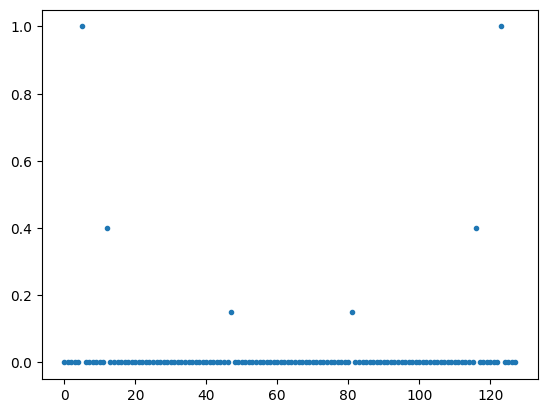

In [14]:
plt.plot( np.arange(0,N,1), abs(ck), '.')

#atenção que a decomposição dos índices 12 e 116 só tem parte complexa

Qual o mapeamento dos índices k para frequência em Hz? O índice k significa voltas completas no período N.

No nosso caso, como foram realizadas N=128 amostras em 1 segundo, quer dizer que a frequência máxima captada foi de 64Hz. O índices 5, 12 e 47 indicam 5Hz 12Hz e 47Hz. E os índices 123, 116 e 81 também indicam as mesmas frequências 5Hz 12Hz e 47Hz.

Como reconstruir o sinal original a partir os coeficientes de fourrier?


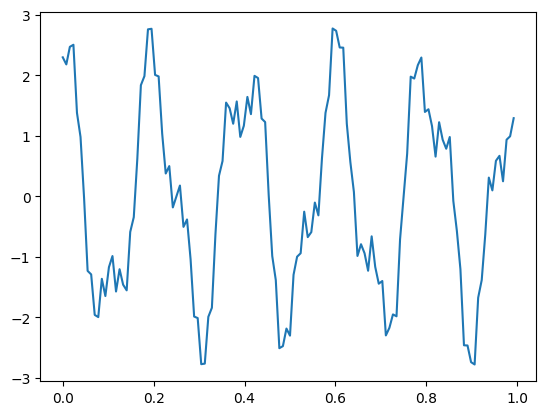

In [184]:
Enk = createbasicWaveformsBase(128)
# xn_reconstruido = np.inner(ck,Enk)
# plt.plot(t, xn_reconstruido)


# que é igual a
# xn_reconstruido = np.inner(Xk/N,Enk)
# que é igual a
xn_reconstruido = np.inner(Xk,Enk)/N
plt.plot(t, xn_reconstruido)

Voltando a gráfico dos coeficientes de fourrier?


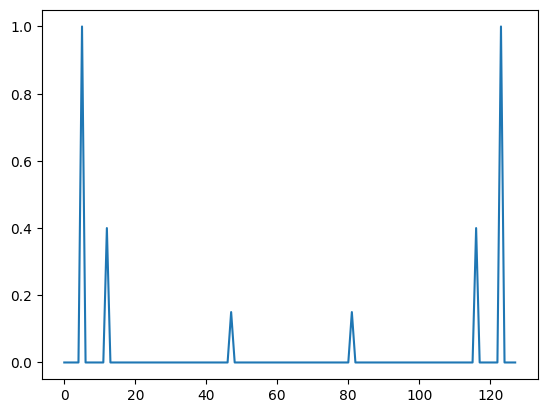

In [16]:
plt.plot( np.arange(0,N,1), abs(ck))


Transformando o abs(ck) para abs(ck)**2, para pegar a energia.

Para virar energia falta multiplicar o sinal por N.

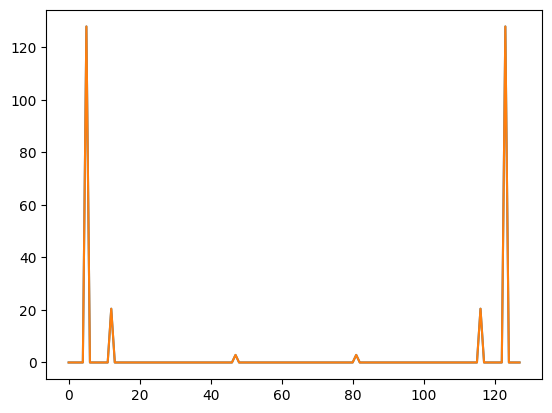

In [17]:
plt.plot( np.arange(0,N,1), N*(abs(ck)**2))
#ou
plt.plot( np.arange(0,N,1), (abs(Xk)**2)/N)

Como os sinais são geminados, vou desenhar as componenetes dos indices [0,63) e duplicar o valore das energias

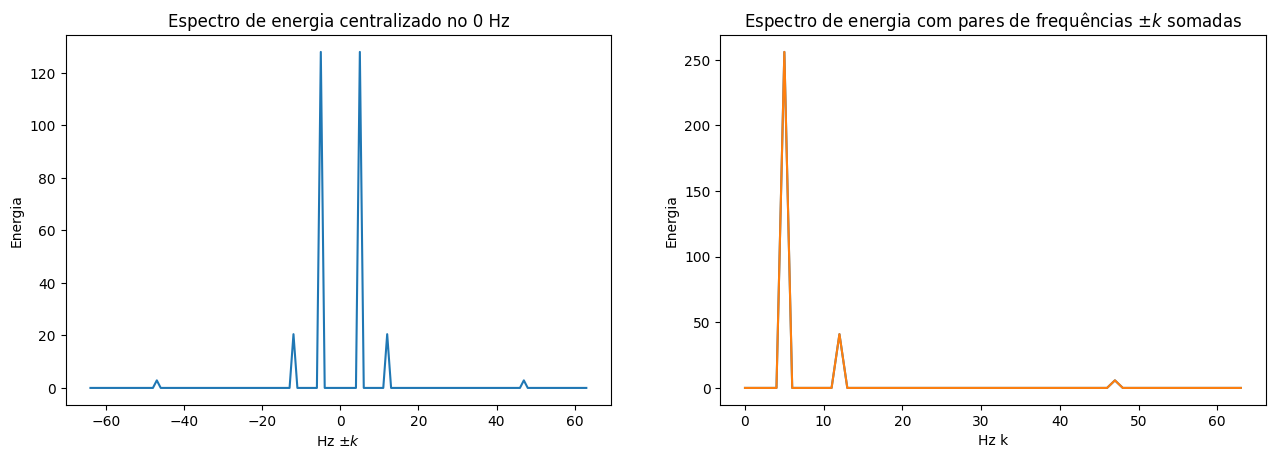

In [187]:
fig, (ax1, ax2) = plt.subplots(1,2)

k1 = np.arange(-N/2,N/2,1)
Energy_k = N*abs(ck)**2
Energy_k_centred = np.roll(Energy_k, int(N/2))
ax1.plot(k1, Energy_k_centred) 
ax1.set_xlabel(r"Hz $\pm k$"); 
ax1.set_ylabel('Energia')
ax1.set_title(f"Espectro de energia centralizado no 0 Hz")

ax2.plot( np.arange(0,N/2,1), 2*N*(abs(ck[0:64])**2))
k2 = np.arange(0,N/2,1)
ck_mag_pos = abs(ck[0:int(N/2)])
ck_mag_neg = abs(np.insert(np.flip(ck)[0:63], 0, ck[0]))
Energy_k_pos = N * ck_mag_pos ** 2
Energy_k_neg = N * ck_mag_neg ** 2
ax2.plot(k2 , Energy_k_pos + Energy_k_neg )
ax2.set_xlabel("Hz k"); 
ax2.set_ylabel('Energia')
ax2.set_title(f"Espectro de energia com pares de frequências $\pm k$ somadas")

plt.subplots_adjust(right=2)

In [151]:
# np.round(np.flip(ck), 2)

# np.concatenate((ck[0], np.flip(ck)[0:63]), axis=0)
# np.concatenate([ck[0]], np.flip(ck)[0:63], axis=1)

np.insert(np.flip(ck)[0:63], 0, ck[0])

(64,)

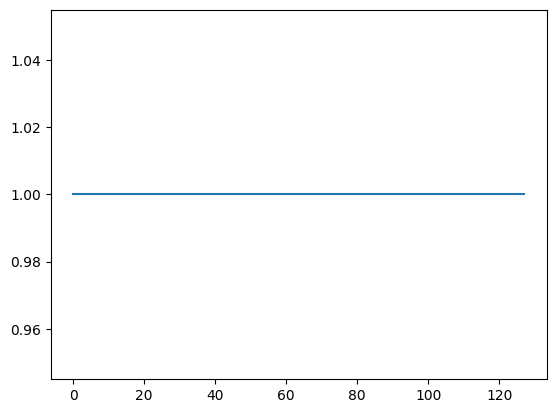

In [19]:
plt.plot( createbasicWaveformsBase(n=128)[0] )


In [20]:
64+5

69

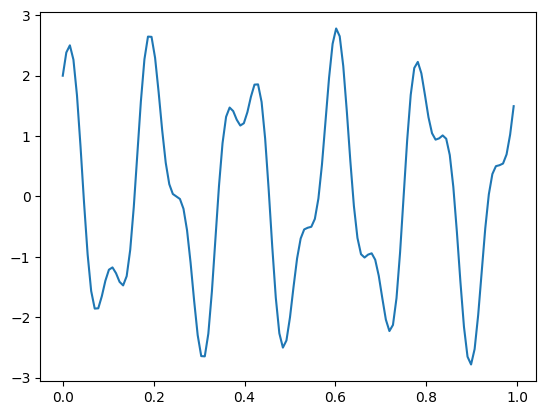

In [21]:
Yk = np.copy(Xk)
k0 = 45
Yk[k0:N-k0:1] *= 0

xn_reconstruido2 = np.fft.ifft(Yk)
plt.plot( np.arange(0,1,1/N), xn_reconstruido2)


    

### Calculando a distorção

$ distorcao = \frac{\vert x - x' \vert}{\vert x \vert} $

In [22]:
def distorcao(x, x_reconstruido):
    diff = x - x_reconstruido
    return np.round(np.abs(np.inner(diff, np.conjugate(diff))/np.inner(x, np.conjugate(x))), 2)



0.58

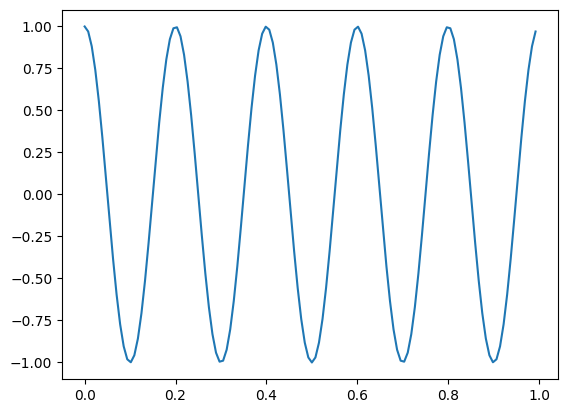

In [23]:
Yk = np.copy(Xk)
k0 = 5
Yk[k0:N-k0:1] *= 0

xn_reconstruido3 = np.fft.ifft(Yk)
plt.plot( np.arange(0,1,1/N), xn_reconstruido3)

distorcao(x, xn_reconstruido3)

### Como calcular a energia do sinal original?

In [169]:
np.linalg.norm(x)**2

302.72000000000014

In [171]:
np.inner(x, x.T)

302.7200000000001

In [172]:
np.inner(x, x)

302.7200000000001

### Como calcular a energia do sinal no domínio da frequência?

A identidade de Parseval descreve apenas que a energia do sinal é igual a soma da energia de suas componentes. 

Os coeficientes do numpy parecem sem compatível com a seguinte descrição:
$$DFT(x_n) = X_k = (x, E_{N,k}), X_k \in \mathbb{C}$$

$$IDFT(X_k) = x_n = \frac{1}{N} (X_k, \overline{E_{N,k}}), x_n \in \mathbb{R} $$

A equação de síntese, divide $X_k$ por $N$.

Além disso, $X_k \in \mathbb{C}$, temos que utilizar o abs(.)


$Energia(k) = N* (\frac{\vert X_k \vert }{N})^2 $

In [186]:
np.sum(N*abs(Xk/N)**2)

302.7199999999999

Text(0.5, 1.0, 'Espectro de energia com pares de frequências $\\pm k$ somadas. Energia=302.72')

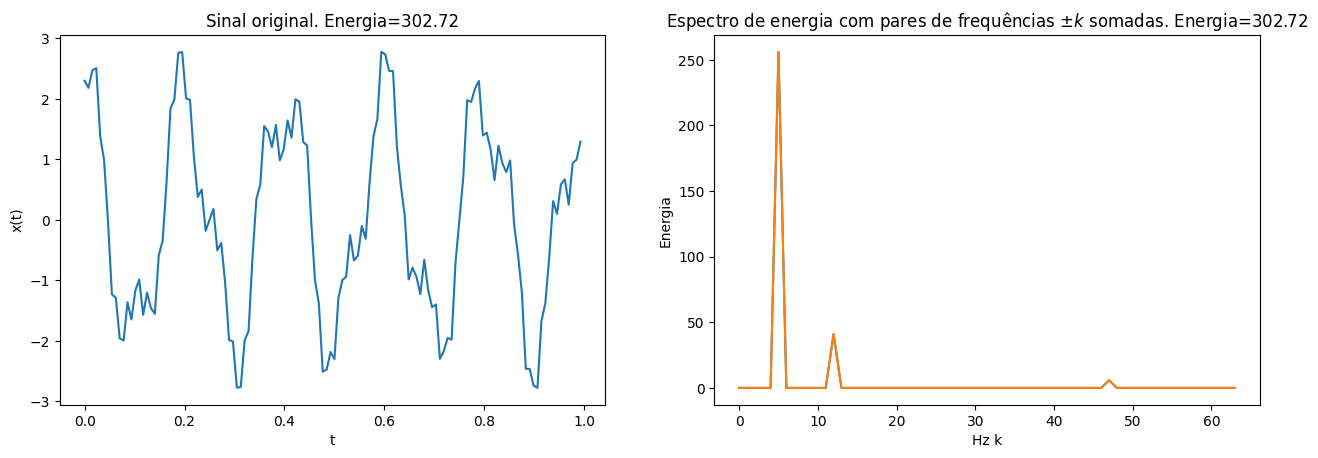

In [198]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(right=2)

ax1.plot(t,x); 
ax1.set_xlabel("t"); 
ax1.set_ylabel("x(t)");
Energia_xn = np.linalg.norm(x)**2
ax1.set_title(f"Sinal original. Energia={Energia_xn:.2f}");

ax2.plot( np.arange(0,N/2,1), 2*N*(abs(ck[0:64])**2))
k2 = np.arange(0,N/2,1)
ck_mag_pos = abs(ck[0:int(N/2)])
ck_mag_neg = abs(np.insert(np.flip(ck)[0:63], 0, ck[0]))
Energy_k_pos = N * ck_mag_pos ** 2
Energy_k_neg = N * ck_mag_neg ** 2
ax2.plot(k2 , Energy_k_pos + Energy_k_neg )
ax2.set_xlabel("Hz k"); 
ax2.set_ylabel('Energia')
ax2.set_title(f"Espectro de energia com pares de frequências $\pm k$ somadas. Energia={np.sum(Energy_k_pos + Energy_k_neg):.2f}")